# GTZAN Dataset - Music Genre Classification

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np
import seaborn as sn

# Gráficos
import matplotlib.pyplot as plt

# Preprocesado y modelado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Usando SVC

El problema es de clasificación múltiple, el cual requiere de un modelo para diferenciar un género musical de otro.

Leemos nuestro conjunto de datos.

In [2]:
df = pd.read_csv('dataset/features_30_sec.csv')

Visualizamos el conjunto de datos.

In [3]:
df.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,1.297741e+05,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,3.758501e+05,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,1.564676e+05,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,1.843559e+05,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,3.433999e+05,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
5,blues.00005.wav,661794,0.302456,0.087532,0.103494,0.003981,1831.993940,1.030482e+06,1729.653287,201910.508633,...,72.549225,-1.838263,68.702026,-2.783800,42.447453,-3.047909,39.808784,-8.109991,46.311005,blues
6,blues.00006.wav,661794,0.291328,0.093981,0.141874,0.008803,1459.366472,4.378594e+05,1389.009131,185023.239545,...,83.248245,-10.913176,56.902153,-6.971336,38.231800,-3.436505,48.235741,-6.483466,70.170364,blues
7,blues.00007.wav,661794,0.307955,0.092903,0.131822,0.005531,1451.667066,4.495682e+05,1577.270941,168211.938804,...,70.438438,-10.568935,52.090893,-10.784515,60.461330,-4.690678,65.547516,-8.630722,56.401436,blues
8,blues.00008.wav,661794,0.408879,0.086512,0.142416,0.001507,1719.368948,1.632828e+05,2031.740381,105542.718193,...,50.563751,-7.041824,28.894934,2.695248,36.889568,3.412305,33.698597,-2.715692,36.418430,blues
9,blues.00009.wav,661794,0.273950,0.092316,0.081314,0.004347,1817.150863,2.982361e+05,1973.773306,114070.112591,...,59.314602,-1.916804,58.418438,-2.292661,83.205231,2.881967,77.082222,-4.235203,91.468811,blues


In [4]:
df.shape

(1000, 60)

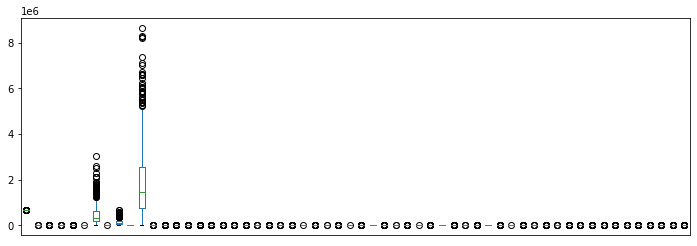

In [5]:
df.plot.box(figsize=(12,4), xticks=[])
pass

## Preprocesamiento de datos

In [6]:
X = df.drop(['filename', 'label'], axis=1) # Seleccionamos las primeras 59 columnas.
y = df['label'] # Seleccionamos la columna 60.

In [7]:
X

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,...,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665
996,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088


In [8]:
y

0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
995     rock
996     rock
997     rock
998     rock
999     rock
Name: label, Length: 1000, dtype: object

Ahora bien, la gráfica de cajas nos sugiere que debemos estandarizar los datos de entrada.

La clase StandardScaler estándariza los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1.

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
df_new = pd.DataFrame(X_scaled, columns=X.columns)

In [11]:
df_new.head(5)

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,-0.132822,-0.350137,0.312587,-0.010690,-0.061856,-0.583585,-0.848311,-0.456402,-0.531042,-0.486473,...,-0.086396,-0.246114,0.500462,-0.780265,-0.237040,-0.643177,0.006723,-0.300597,0.604064,-0.512988
1,-0.132822,-0.462482,1.117572,-0.532852,-0.186821,-0.938516,-0.234194,-0.386852,0.796252,-0.648681,...,-0.048102,-0.159175,0.711371,-0.069304,-0.054982,-0.453456,0.544806,-0.407087,0.424127,-0.538421
2,-0.132822,-0.184225,-0.137701,0.679978,-0.084093,-0.906885,-0.781694,-0.940663,-0.630916,-0.971592,...,0.284825,-0.596243,-0.827516,-0.448091,-0.600983,-0.329519,-0.295934,-0.527297,-0.296189,-0.874954
3,-0.132822,0.319639,0.990659,0.154810,0.907029,-1.581429,-0.712095,-1.228256,0.304565,-1.516390,...,-0.080249,-0.482843,0.142153,-0.371370,0.033427,-0.767591,0.455409,-0.779744,-0.602881,-0.844508
4,-0.132822,-0.859077,0.194163,-0.600165,-0.205909,-0.512542,-0.315178,-0.939770,-0.504463,-0.630107,...,-1.238616,0.751318,-0.327220,0.377620,-0.368375,-0.293696,-0.553016,-0.089383,-2.766009,-0.330287


La variable de salida (la columna 60) es un valor de string (correspondiente al género musical). Debemos convertirlos en valores enteros entre 0 y 9. Esto lo podemos lograr usando la clase LabelEncoder, pues ésta modelará la codificación requerida usando todo el conjunto de datos a través de la función fit(), luego aplicará la codificación para crear una nueva variable de salida usando la función transform().

In [12]:
encoder = LabelEncoder()
encoder.fit(y)
 
encoded_Y = encoder.transform(y)

donde obtenemos que 

* 0 $\rightarrow$ blues
* 1 $\rightarrow$ classical
* 2 $\rightarrow$ country
* 3 $\rightarrow$ disco
* 4 $\rightarrow$ hiphop
* 5 $\rightarrow$ jazz
* 6 $\rightarrow$ metal
* 7 $\rightarrow$ pop
* 8 $\rightarrow$ reggae
* 9 $\rightarrow$ rock

In [13]:
df_new2 = pd.DataFrame(encoded_Y)

In [14]:
df_new2

,0
0,0
1,0
2,0
3,0
4,0
...,...
995,9
996,9
997,9
998,9


In [15]:
# Dividimos nuestro conjunto en entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, encoded_Y, test_size=0.2)

## Modelo

Creamos el modelo y lo entrenamos.

In [16]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

### Predicciones y resultados

Realizamos predicciones y visualizamos los resultados de éstas.

In [17]:
y_pred = svclassifier.predict(X_test)

In [18]:
print('Accuracy of SVD classifier on training set: {:.2f}'
     .format(svclassifier.score(X_train, y_train)))
print('Accuracy of SVD classifier on test set: {:.2f}'
     .format(svclassifier.score(X_test, y_test)))

Accuracy of SVD classifier on training set: 0.98
Accuracy of SVD classifier on test set: 0.76


In [23]:
dfp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

dfp.head(15)

,Actual,Predicted
0,4,4
1,9,2
2,5,5
3,2,2
4,2,0
5,3,3
6,1,1
7,3,9
8,8,4
9,9,3


In [20]:
print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test, y_pred))
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean Absolute Error: 1.00
Mean squared error: 5.24
Root Mean Squared Error: 2.29
Variance score: 0.35


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.68      0.67        19
           1       0.94      0.89      0.92        19
           2       0.60      0.86      0.71        21
           3       0.67      0.71      0.69        17
           4       0.75      0.95      0.84        19
           5       0.76      0.65      0.70        20
           6       0.96      0.85      0.90        26
           7       0.85      0.77      0.81        22
           8       0.89      0.53      0.67        15
           9       0.67      0.64      0.65        22

    accuracy                           0.76       200
   macro avg       0.77      0.75      0.75       200
weighted avg       0.78      0.76      0.76       200



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

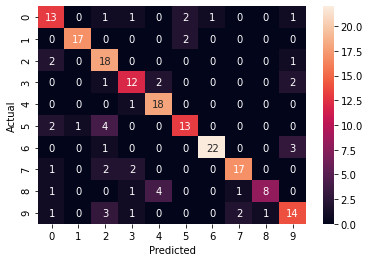

In [22]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)